In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

https://elec548.github.io/Assignments/hw5.html

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Example using PCA: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python


# Exercise 1

For Problem 1 of this assignment, you will again use the reach data from HW 3 (in file ReachData.npz on Canvas).

Visualization of high-dimensional neural activity using PCA (30 pts) For this problem, you will again use the reach data from HW 5 (in file ReachData.npz on Canvas). Begin by extracting the “plan” data for all trials and all targets. Use a constant length window 200 ms long starting 50 ms after the timeTouchHeld. You should end up with a matrix of N×K, where N is the number of neurons and K is the total number of trials.

In [25]:
spikeTimes = np.load('HW3_files/spikeTimes.npy', allow_pickle=True)
timeGoCue = np.load('HW3_files/timeGoCue.npy', allow_pickle=True)
timeTargetAcquire = np.load('HW3_files/timeTargetAcquire.npy', allow_pickle=True)
timeTouchHeld = np.load('HW3_files/timeTouchHeld.npy', allow_pickle=True)
cfr = np.load('HW3_files/cfr.npy', allow_pickle=True)

In [26]:
np.shape(spikeTimes)

(1127, 190)

In [27]:
# Modified example code for finding the number of spikes in the plan window

planSpikes = []

for trialIdx, trialSpikes in enumerate(spikeTimes):
    planSpikes.append([np.sum((st > timeTouchHeld[trialIdx]+50) & (st < timeTouchHeld[trialIdx]+250)) for st in trialSpikes])

planSpikes = np.array(planSpikes) # will be 1127 x 190 (number of trials by number of neurons)
# movementSpikes = np.array(movementSpikes) # will be 1127 x 190 (number of trials by number of neurons)
# planSpikes, movementSpikes

In [28]:
print(np.shape(planSpikes)) # total number of trials * number of neurons
print(np.shape(planSpikes.T)) # number of neurons * total number of trials

(1127, 190)
(190, 1127)


a. Calculate the principal components of the neural activity (there is a PCA decomposition within sklearn, but you can also just use the numpy.linalg.eig function). Plot the square-rooted eigenvalue spectrum. If you had to identify an elbow in the eigenvalue spectrum, how many dominant eigenvalues would there be? What percentage of the overall variance is captured by the top 3 principal components?

In [29]:
pca = PCA()
pca.fit(planSpikes.T)

PCA()

<IPython.core.display.Javascript object>


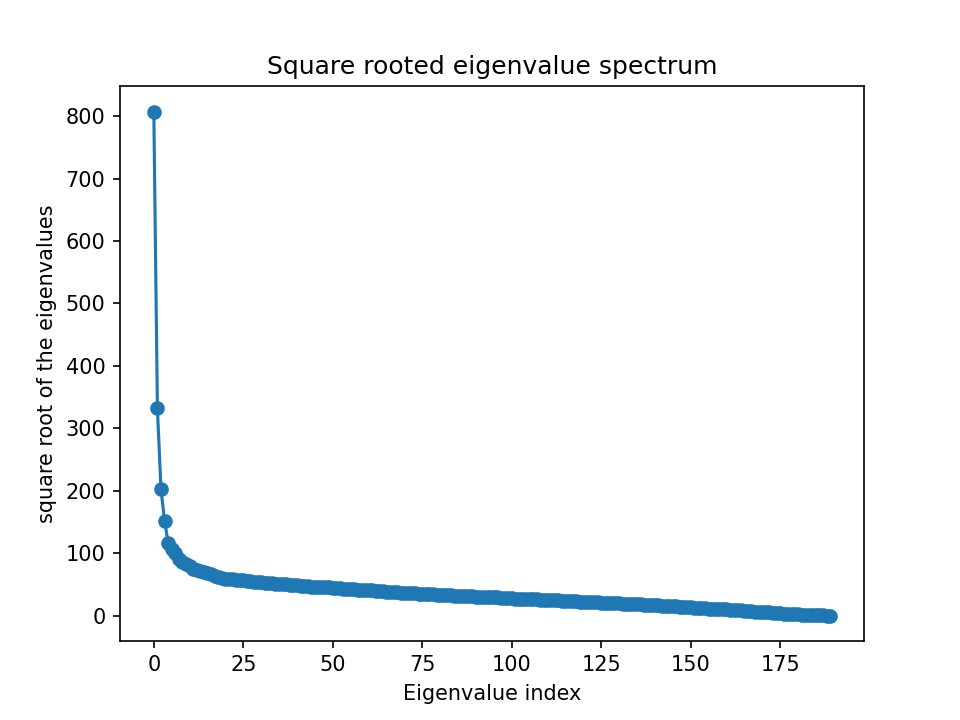

In [30]:
plt.plot(pca.singular_values_, marker="o")
plt.title("Square rooted eigenvalue spectrum")
plt.xlabel("Eigenvalue index")
plt.ylabel("square root of the eigenvalues")
plt.show()

We can determine the elbow depending on when the rate of change does not change much from one point to the next
This is the same convergence criterium used in HW4 for the cost funtion, just that we will change the weight, instead of being 0.001, we could change it to 0.2. It must simply be a small value, close to zero and less than 1.

``` np.abs(J[i-1]-J[i])< 0.001*J[i]```

In [31]:
for i in range(len(pca.singular_values_)):
    if (pca.singular_values_[i] - pca.singular_values_[i+2])/pca.singular_values_[i+2] < 0.2:
        print("The elbow in the eigenvalue spectrum is in eigenvalue #"+str(i+1))
        break

The elbow in the eigenvalue spectrum is in eigenvalue #5


The percentage of overall variance that is captured by the top 3 principal components is:

In [32]:
100*np.sum(pca.explained_variance_ratio_[0:3])

72.94408158232211

In [33]:
np.sum(pca.explained_variance_ratio_)

0.9999999999999998

b. For the purposes of visualization, we’ll consider the PC space defined by the top M = 3 eigenvectors. Project the data into the three-dimensional PC space. Plot the projected points in a 3D plot (example here) and color each dot appropriately according to reaching target. Rotate the axes (example here) to show a view in which the clusters are well-separated.

http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html

(1127, 190)
(190, 3)


<IPython.core.display.Javascript object>


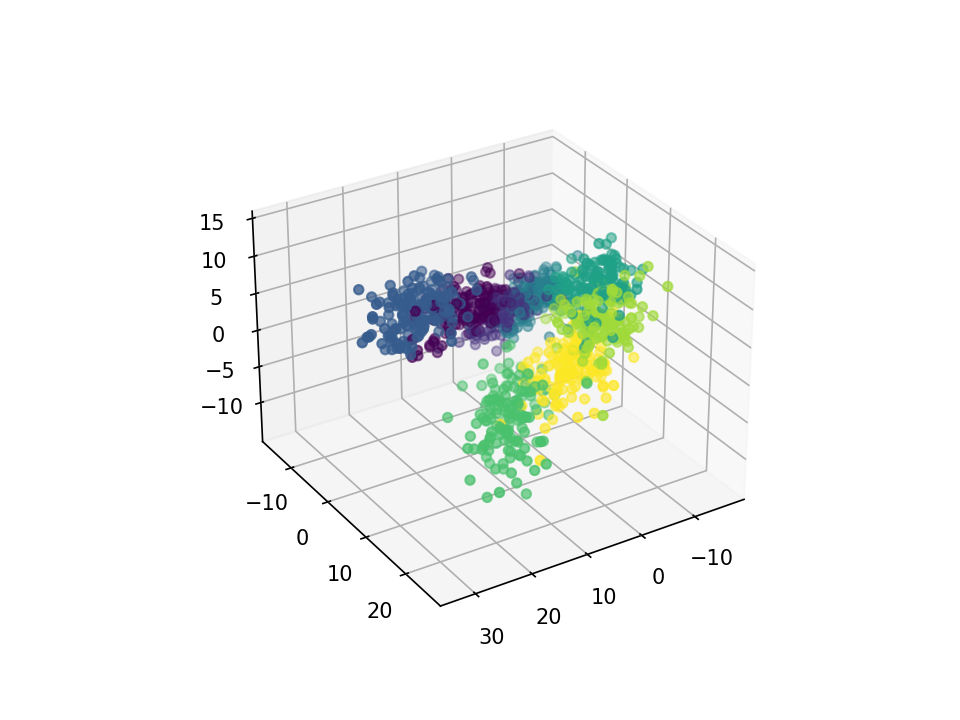

In [34]:
pca = PCA(n_components=3)
pca.fit(planSpikes)
print(planSpikes.shape)

eigenvectors = pca.components_.T
print(eigenvectors.shape)


# These two expressions for z are equivalent
# z = np.matmul(planSpikes, eigenvectors)

# Based on Caleb's code for projecting
#  BUT, when you're projecting, make sure that you're using the eigenvectors
# (as opposed to the transpose of the eigenvector matrix!).

subtraction = planSpikes - np.mean(planSpikes,axis=0)
z = subtraction.dot(eigenvectors[:,:3])

%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(z[:,0],z[:,1], z[:,2], c = cfr)
plt.show()

c. Define a matrix UM∈RD×M
containing the top three eigenvectors (i.e., PC directions), where UM(d,m) indicates the contribution of the dth neuron to the mth principal component. Show the values in UM, e.g., by calling imshow(UM )’. (Note: Also call colorbar’ to show the scale.) Are there are any obvious groupings among the neurons in each column of UM?

In [35]:
UM = pca.components_
np.shape(UM.T)

(190, 3)

<IPython.core.display.Javascript object>


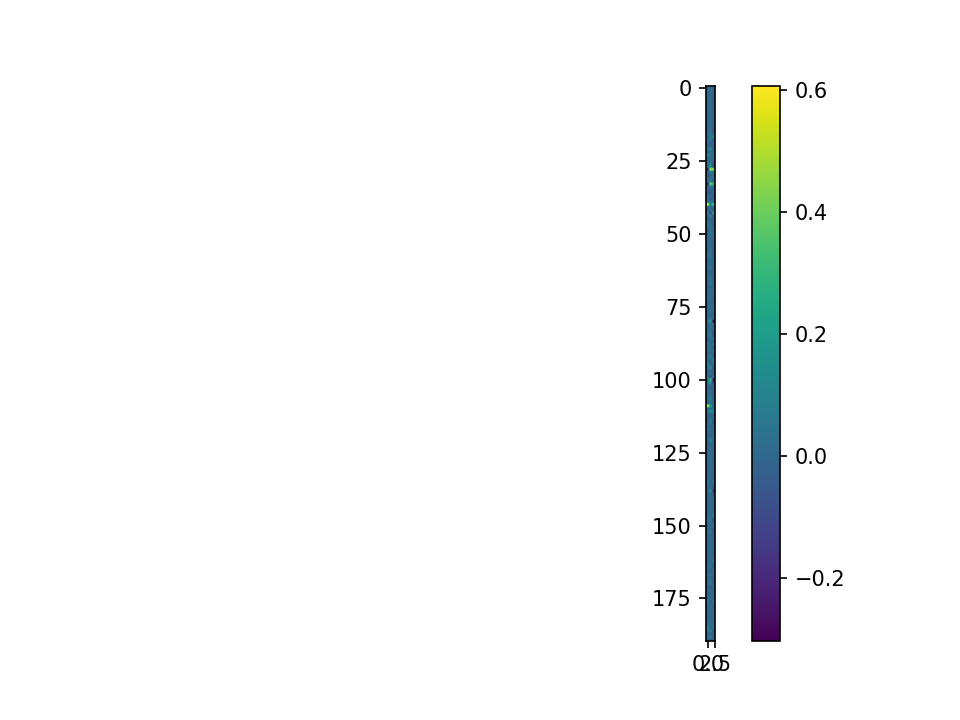

In [36]:
plt.figure()
# plt.imshow(UM.T,extent=[0,100,0,1], aspect=100) # Bigger, but the colors smooth
plt.imshow(UM.T)
plt.colorbar()
plt.show()

# FALTA: Are there any obvious groupings?

# Exercise 2
For Problem 2, you will use the datasets from HW4, SpikeData05.npz and SpikeData12.npz, which contain numpy arrays SpikeWaveforms and RawData. (The raw data was too large to upload. It is available on request.)

a) Begin with the data from the numpy file SpikeData05.npz. Use the first 5000 samples. Calculate the principal components of the spike waveforms on the first tetrode channel. Plot the square-rooted eigenvalue spectrum. If you had to identify an elbow in the eigenvalue spectrum, how many dominant eigenvalues would there be? What percentage of the overall variance is captured by the top 3 principal components?

In [67]:
SpikeWaveforms = np.load('HW4_files/SpikeWaveforms05.npy', allow_pickle=True)
print(np.shape(SpikeWaveforms))
# AP detected, time, electrode

(33787, 40, 4)


In [68]:
np.shape(SpikeWaveforms[0:5000,:,0])
first_tetrode = SpikeWaveforms[0:5000,:,0]

pca = PCA(n_components=3)
pca.fit(first_tetrode)
print(first_tetrode.shape)

eigenvectors = pca.components_.T
print(eigenvectors.shape)


# These two expressions for z are equivalent
# z = np.matmul(planSpikes, eigenvectors)

# Based on Caleb's code for projecting
#  BUT, when you're projecting, make sure that you're using the eigenvectors
# (as opposed to the transpose of the eigenvector matrix!).

subtraction = first_tetrode - np.mean(first_tetrode,axis=0)
z = subtraction.dot(eigenvectors[:,:3])

(5000, 40)
(40, 3)


<IPython.core.display.Javascript object>


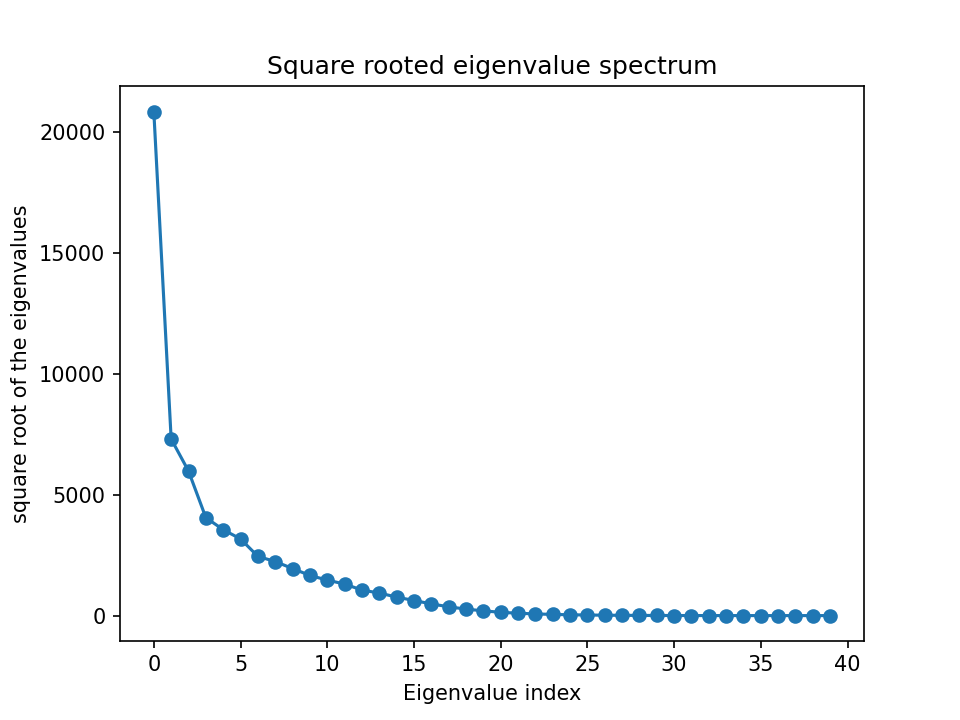

In [69]:
plt.plot(indices, pca.singular_values_, marker="o")
plt.xlabel("Eigenvalue index")
plt.ylabel("square root of the eigenvalues")
plt.title("Square rooted eigenvalue spectrum")
plt.show()

In [70]:
for i in range(len(pca.singular_values_)):
    if (pca.singular_values_[i] - pca.singular_values_[i+2])/pca.singular_values_[i+2] < 0.3:
        print("The elbow in the eigenvalue spectrum is in eigenvalue #"+str(i+1))
        break

The elbow in the eigenvalue spectrum is in eigenvalue #4


The percentage of overall variance that is captured by the top 3 principal components is:

In [71]:
100*np.sum(pca.explained_variance_ratio_[0:3])

89.11041647719952

b. Plot the mean and the first 2 principal components. What do they look like?

# FALTA!
Why are the eigenvalues so small compared to the mean? Are we obtaining them accurately? 

In [75]:
np.mean(np.mean(first_tetrode,axis=0))

2.987776939845568

<IPython.core.display.Javascript object>


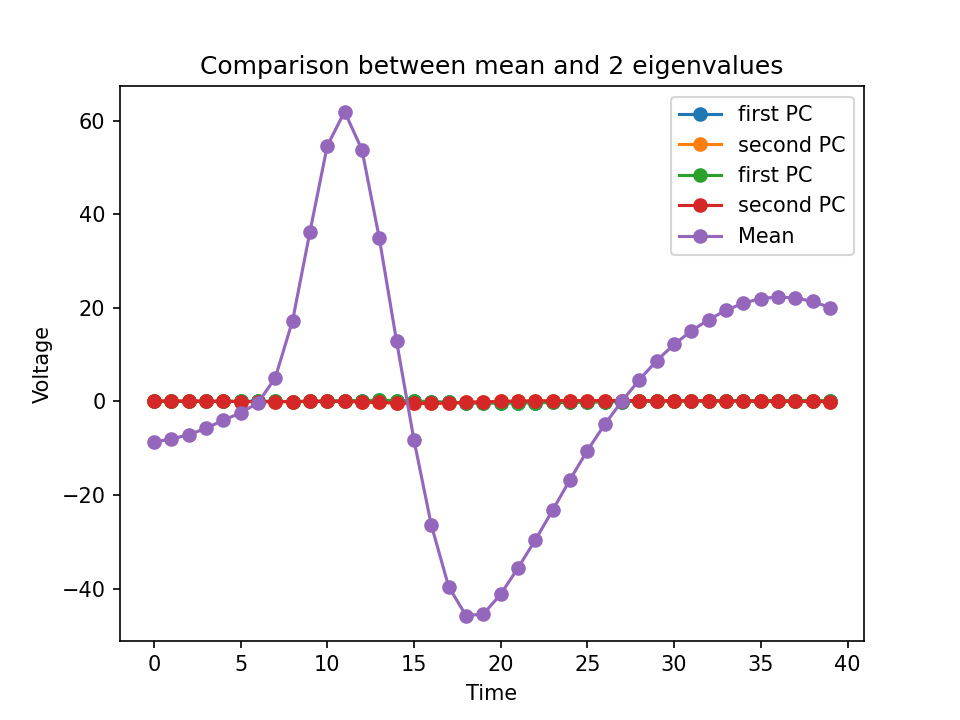

In [76]:
plt.plot(eigenvectors[:,0], marker="o", label="first PC") #[0.2,-0.4]
plt.plot(eigenvectors[:,1], marker="o", label="second PC")

plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("2 eigenvalues")
plt.legend()
plt.show()

In [77]:
plt.plot(eigenvectors[:,0], marker="o", label="first PC") #[0.2,-0.4]
plt.plot(eigenvectors[:,1], marker="o", label="second PC")
plt.plot(np.mean(first_tetrode,axis=0), marker="o", label="Mean") #[60,-40]

plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Comparison between mean and 2 eigenvalues")
plt.legend()
plt.show()

Note how the eigenvectors are so small. This is because they are normalized, so when we compare directly with the mean of our data, they seem to be very small.

c. Now repeat the process for the first 5000 samples in SpikeData12.npz, again just using the first tetrode channel. Are there any major differences?

In [81]:
SpikeWaveforms = np.load('HW4_files/SpikeWaveforms12.npy', allow_pickle=True)
print(np.shape(SpikeWaveforms))
# AP detected, time, electrode

np.shape(SpikeWaveforms[0:5000,:,0])
first_tetrode = SpikeWaveforms[0:5000,:,0]


pca = PCA()
pca.fit(first_tetrode)
print(first_tetrode.shape)

eigenvectors = pca.components_.T
print(eigenvectors.shape)


# These two expressions for z are equivalent
# z = np.matmul(planSpikes, eigenvectors)

# Based on Caleb's code for projecting
#  BUT, when you're projecting, make sure that you're using the eigenvectors
# (as opposed to the transpose of the eigenvector matrix!).

subtraction = first_tetrode - np.mean(first_tetrode,axis=0)
z = subtraction.dot(eigenvectors[:,:3])

(16789, 40, 4)
(5000, 40)
(40, 40)


<IPython.core.display.Javascript object>


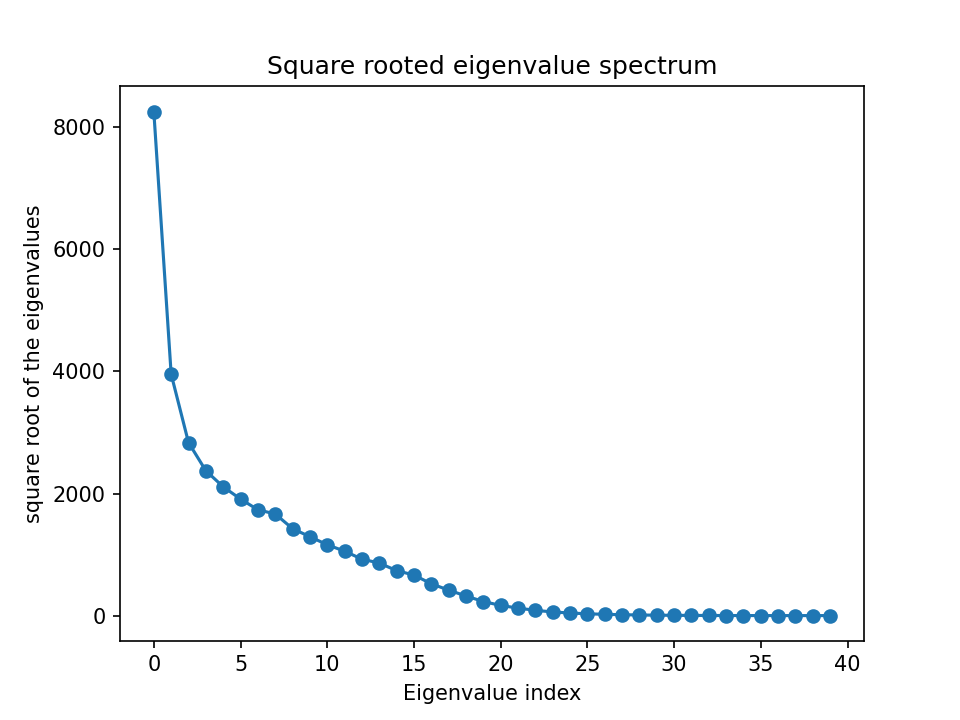

In [82]:
plt.plot(pca.singular_values_, marker="o")
plt.xlabel("Eigenvalue index")
plt.ylabel("square root of the eigenvalues")
plt.title("Square rooted eigenvalue spectrum")
plt.show()

In [83]:
for i in range(len(pca.singular_values_)):
    if (pca.singular_values_[i] - pca.singular_values_[i+2])/pca.singular_values_[i+2] < 0.3:
        print("The elbow in the eigenvalue spectrum is in eigenvalue #"+str(i+1))
        break

The elbow in the eigenvalue spectrum is in eigenvalue #4


In [84]:
100*np.sum(pca.explained_variance_ratio_[0:3])

89.11041647719952

<IPython.core.display.Javascript object>


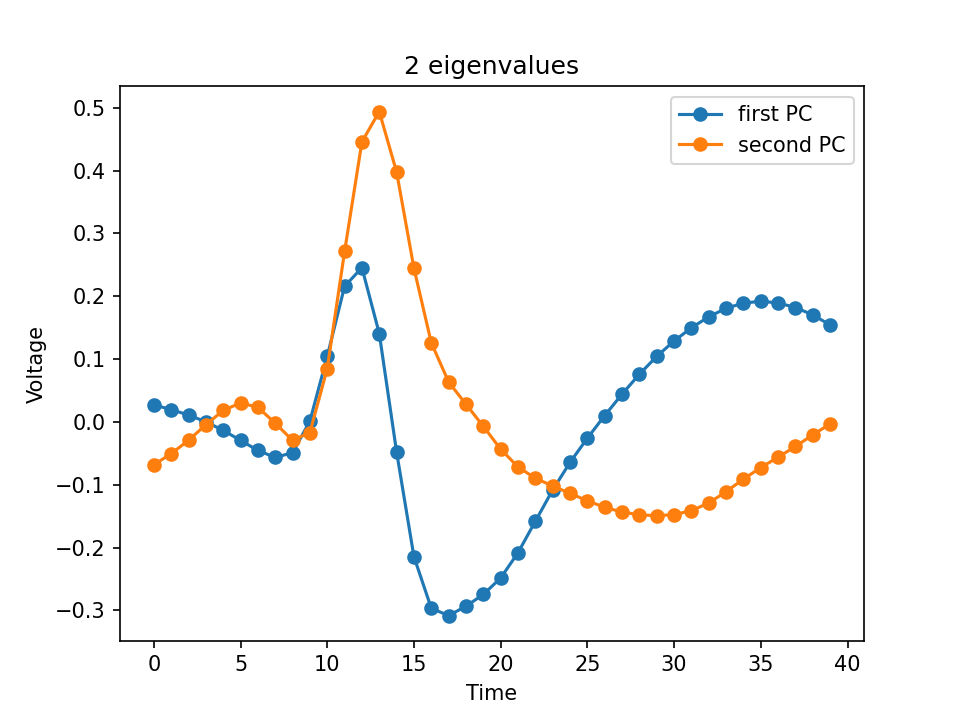

In [89]:
plt.plot(eigenvectors[:,0], marker="o", label="first PC") #[0.2,-0.4]
plt.plot(eigenvectors[:,1], marker="o", label="second PC")

plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("2 eigenvalues")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


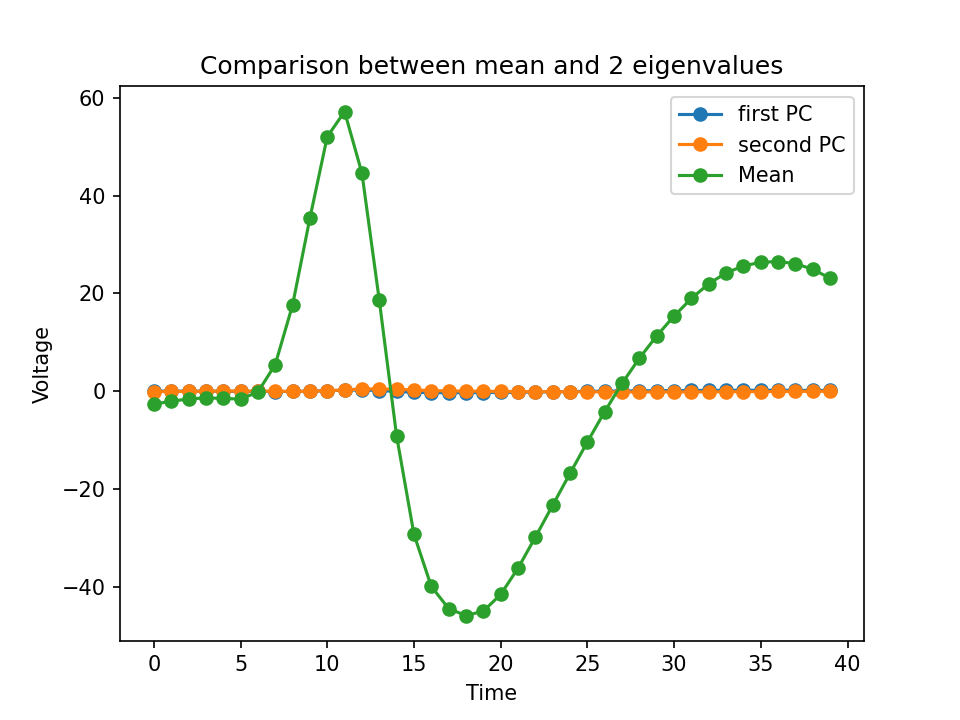

In [90]:
plt.plot(eigenvectors[:,0], marker="o", label="first PC") #[0.2,-0.4]
plt.plot(eigenvectors[:,1], marker="o", label="second PC")
plt.plot(np.mean(first_tetrode,axis=0), marker="o", label="Mean")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Comparison between mean and 2 eigenvalues")
plt.legend()
plt.show()

# FALTA, are there any major differences?

d. Now, consider all the channels in SpikeData12 as a single, 160x1 vector. Calculate the principal components of this larger vector. Plot the square-rooted eigenvalues - how many dominant eigenvalues do you think there are?

# But this has (16789, 40, 4), how to obtain the 160*1?

In [92]:
sw = SpikeWaveforms
large_vector = [np.concatenate((sw[i,:,0], sw[i,:,1], sw[i,:,2], sw[i,:,3])) for i in range(np.shape(sw)[0])]

np.shape(large_vector)

(16789, 160)

In [95]:
pca = PCA()
pca.fit(large_vector)
# print(large_vector.shape)

eigenvectors = pca.components_.T
print(eigenvectors.shape)


# These two expressions for z are equivalent
# z = np.matmul(planSpikes, eigenvectors)

# Based on Caleb's code for projecting
#  BUT, when you're projecting, make sure that you're using the eigenvectors
# (as opposed to the transpose of the eigenvector matrix!).

subtraction = large_vector - np.mean(large_vector,axis=0)
z = subtraction.dot(eigenvectors[:,:3])

(160, 160)


<IPython.core.display.Javascript object>


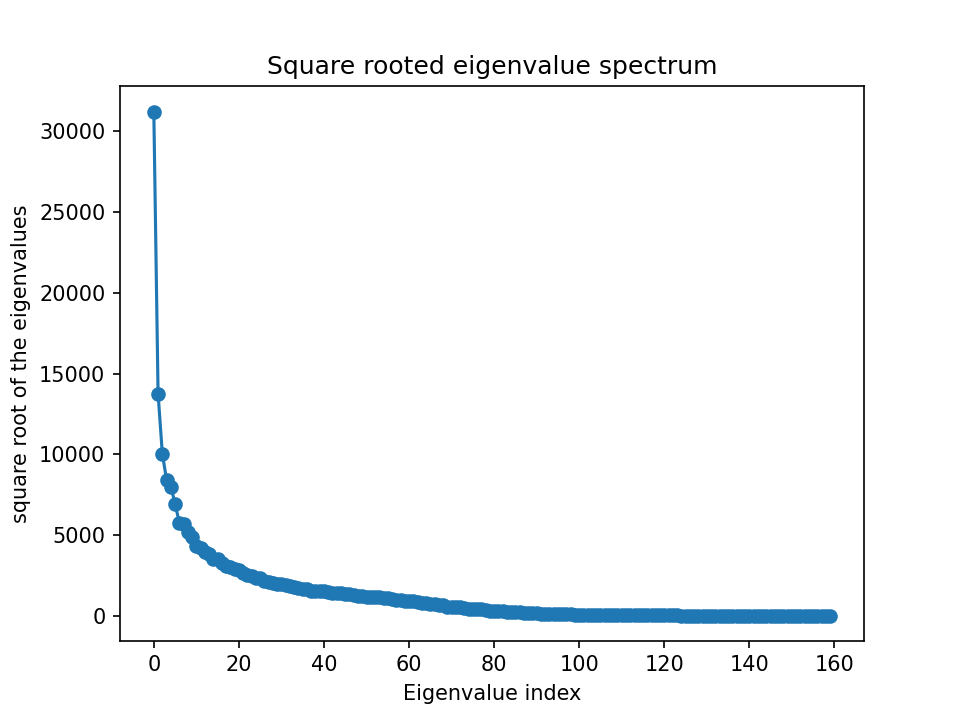

In [96]:
plt.plot(pca.singular_values_, marker="o")
plt.xlabel("Eigenvalue index")
plt.ylabel("square root of the eigenvalues")
plt.title("Square rooted eigenvalue spectrum")
plt.show()

In [99]:
for i in range(len(pca.singular_values_)):
    if (pca.singular_values_[i] - pca.singular_values_[i+2])/pca.singular_values_[i+2] < 0.2:
        print("The elbow in the eigenvalue spectrum is in eigenvalue #"+str(i+1))
        break

The elbow in the eigenvalue spectrum is in eigenvalue #7


In [ ]:
plt.plot(eigenvectors[:,0], marker="o", label="first PC") #[0.2,-0.4]
plt.plot(eigenvectors[:,1], marker="o", label="second PC")

plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("2 eigenvalues")
plt.legend()
plt.show()

In [ ]:
# Check that when plotting as a vector, the time series has 4 spikes in it.

plt.plot(np.mean(large_vector, axis=0))
plt.show()

e. Plot and compare the mean and the first 2 principal component vectors corresponding to the first tetrode channel when PCA is done only on the single channel data versus when the PCA is done on the full 160-dimensional tetrode data. of the tetrode principal components. (These will both be sets of 1x40 vectors!) How do the values for the first channel differ from the values in the single channel analysis from (c)? What is the difference in the fraction of the variance in the first tetrode channel captured by the 4 channel PCA vs. the single channel PCA? What about the first three principal components? Hint: Only consider the first tetrode channel. Calculate the total variance in the samples, then project into the space of the first two principal components (either single channel or full data). Back-project these into waveform space by multiplying by the principal component vectors and adding the results. Add the mean to get back to the original. Now calculate the variance (only for the first tetrode channel!) of these effectively lower dimensional waveforms, and take the ratio to the baseline.)

# Exercise 3

For PCA and P-PCA, the notebook makes a plot showing:

 - Each data point xn as a black dot in its native 2-D space
 - The mean, μ as a green point
 - The PC space found by either PCA or P-PCA (which is one dimensional) plotted as a line segment
 - The projection of each data point into the PC space as red points
 - A red line connecting the original and lower dimensional data

a. The lower dimensional space found by PCA and P-PCA are the same. So why are the lines in P-PCA not orthogonal as they are in the PCA case?

b. Using the code for P-PCA as a guide, implement the EM algorithm for Factor Analysis and make a plot showing the same information. Note that the lower dimensional space found by FA will pass through the mean but will not be the same as in PCA/P-PCA. Why is it different?